In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
seaborn.set()

In [31]:
data = pd.read_csv("churn.txt")

In [32]:
print(data.head())

  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0    

In [7]:
summary = data.describe()

In [8]:
summary = summary.transpose()

In [9]:
print(summary.head())

                 count        mean        std    min    25%    50%    75%  \
Account Length  3333.0  101.064806  39.822106    1.0   74.0  101.0  127.0   
Area Code       3333.0  437.182418  42.371290  408.0  408.0  415.0  510.0   
VMail Message   3333.0    8.099010  13.688365    0.0    0.0    0.0   20.0   
Day Mins        3333.0  179.775098  54.467389    0.0  143.7  179.4  216.4   
Day Calls       3333.0  100.435644  20.069084    0.0   87.0  101.0  114.0   

                  max  
Account Length  243.0  
Area Code       510.0  
VMail Message    51.0  
Day Mins        350.8  
Day Calls       165.0  


At the start of an analysis, sometimes the analyst has some hypothesis about the relationships of two (or more) variables. But, sometimes they don't, so exploratory analyses are helpful for exploring the data to see possible trends or peculiarities. One might see associations, outliers, or other interesting things by using summaries (like above), or graphics.

In [11]:
print(len(data['Churn?']))

3333


In [12]:
#To get the proportions of churn
prop_churn = sum(data['Churn?'] == "True.") / len(data['Churn?'])
print(prop_churn)

0.144914491449


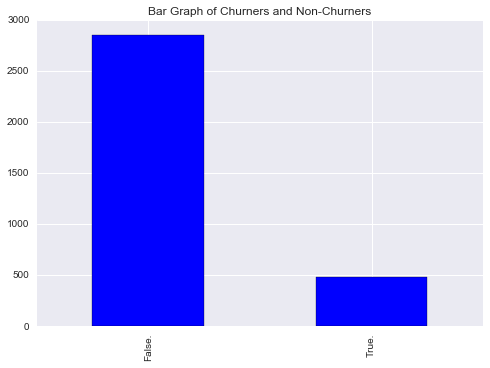

In [52]:
#This creates a bar graph of churn (true vs. false)
data['Churn?'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Churners and Non-Churners', color = 'blue', align = 'center')
plt.show()

When observing categorical variables, it is often a useful practice to create contingency tables for distributions and marginal distributions, in this case, to quantify the relationship between Churn (T/F) and International Plan (Y/N). These can be graphed (and overlayed) to show proportions.

In [16]:
#Creates initial contingency table between Churn and International Plan
int_churn_contingency = pd.crosstab(data["Int'l Plan"], data["Churn?"])
print(int_churn_contingency)

Churn?      False.  True.
Int'l Plan               
no            2664    346
yes            186    137


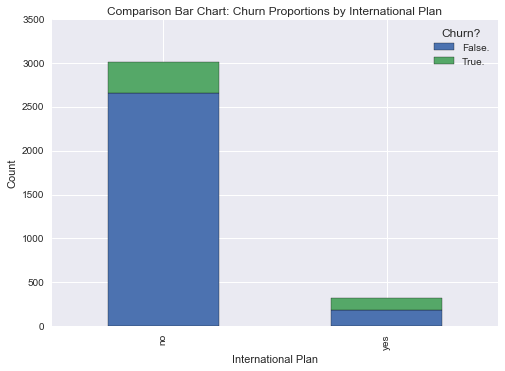

In [53]:
#Stacked Barplot of International Plan Use and Churn
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Comparison Bar Chart: Churn Proportions by International Plan")
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

In [36]:
#Table of Sums for Both Variables
int_churn_sums = pd.crosstab(data["Int'l Plan"], data["Churn?"], margins = True)
print(int_churn_sums)

Churn?      False.  True.   All
Int'l Plan                     
no            2664    346  3010
yes            186    137   323
All           2850    483  3333


In [19]:
#Table of proportions; doesn't match the book
int_churn_props = int_churn_sums / int_churn_sums.ix["All", "All"]
print(int_churn_props)

Churn?        False.     True.      All
Int'l Plan                             
no          0.799280  0.103810  0.90309
yes         0.055806  0.041104  0.09691
All         0.855086  0.144914  1.00000


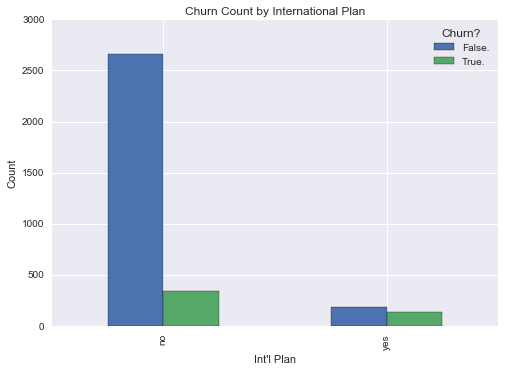

In [37]:
#Clustered bar graph; churn by international
int_churn_contingency.plot(kind = 'bar', legend = True)
plt.ylabel('Count')
plt.title('Churn Count by International Plan')
plt.show()

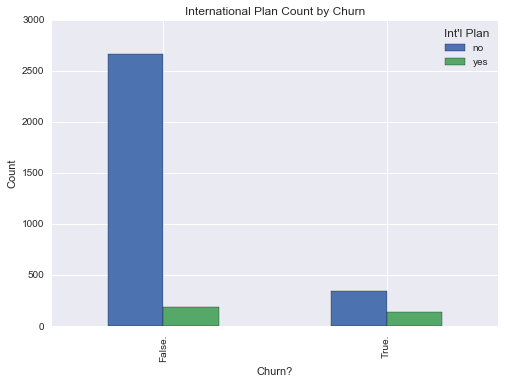

In [38]:
#Clustered bar graph; international by churn. Legend in book is wrong.
inverted_contingency = pd.crosstab(data["Churn?"], data["Int'l Plan"])
inverted_contingency.plot(kind = 'bar', legend = True)
plt.ylabel('Count')
plt.title('International Plan Count by Churn')
plt.show()

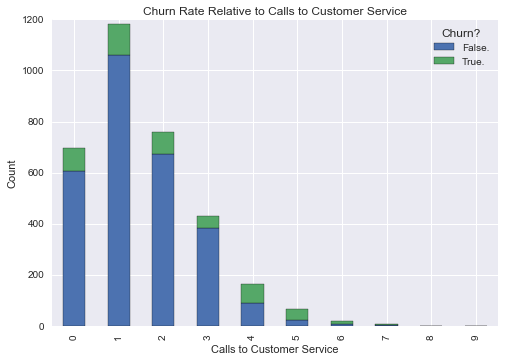

In [43]:
#Stacked Bar of Customer Service Calls and Churn
cust_serv_churn = pd.crosstab(data['CustServ Calls'], data['Churn?'])
cust_serv_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Calls to Customer Service')
plt.title('Churn Rate Relative to Calls to Customer Service')
plt.show()

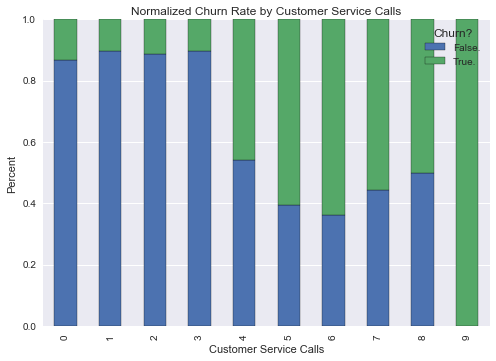

In [40]:
##https://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/matplotlib/matplotlib-applied.ipynb  ..This was tricky for me but I found this documentation to be useful.
cust_serv_churn_norm = cust_serv_churn.div(cust_serv_churn.sum(1).astype(float), axis = 0)
cust_serv_churn_norm.plot(kind = 'bar', stacked = True, title = "Normalized Churn Rate by Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Percent")
plt.show()

**Non-normalized histograms should always be provided with their normalized counterpart to show the full picture of the variable's distribution.**

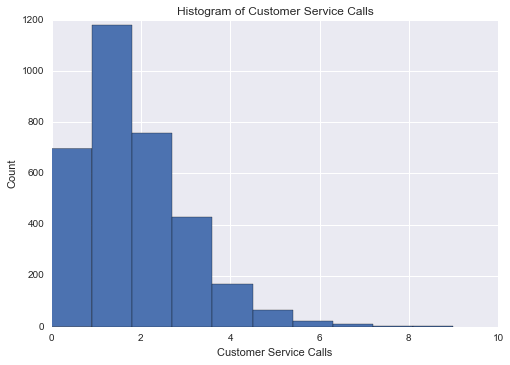

In [41]:
#Histogram of Customer Service Calls
plt.hist(data['CustServ Calls'])
plt.title("Histogram of Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Count")
plt.show()

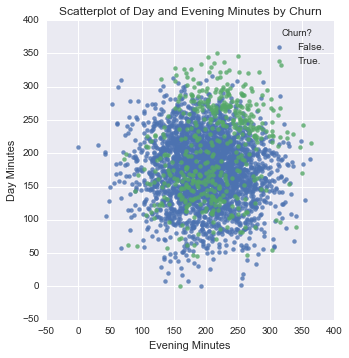

In [42]:
#Scatterplot of Evening Minutes and Day Minutes by Churn
seaborn.lmplot('Eve Mins', 'Day Mins', data = data, hue = 'Churn?', fit_reg = False, legend_out = False)
plt.title('Scatterplot of Day and Evening Minutes by Churn')
plt.xlabel("Evening Minutes")
plt.ylabel("Day Minutes")
plt.show()

Univariate explorations don't catch everything, so sometimes it can be useful to explore multivariate relationships. For example, those with high evening minutes didn't have blatantly high churn rates, however, a scatterplot that plots day minutes vs. evening minutes shows that customers that have both high day minutes and high evening minutes churn at far greater rates.

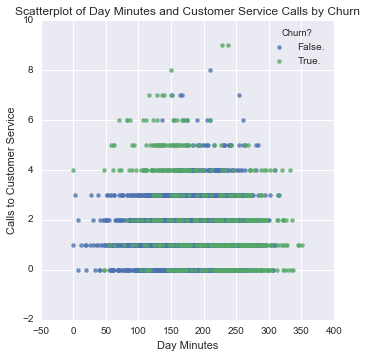

In [46]:
#Scatterplot of Day Minutes and Customer Service Calls by Churn
seaborn.lmplot('Day Mins', 'CustServ Calls', data = data, hue = 'Churn?', fit_reg = False, legend_out = False)
plt.title('Scatterplot of Day Minutes and Customer Service Calls by Churn')
plt.xlabel('Day Minutes')
plt.ylabel('Calls to Customer Service')
plt.show()

Multivariate explorations can yield insights about "interactions" and can uncover subsets of records that call for further investigation, like the area to the top left of the above plot that are low in day minutes but high in customer service calls. These differences can be quantified and flagged/targeted, e.g.: those with high customer service calls and low day minutes have a 65% probability of churning, whereas only 26% of customers with high customer service calls and high day minutes are churners. Thus, we can red-flag customers with high customer-service calls and low day minutes, because they are at risk of churning.

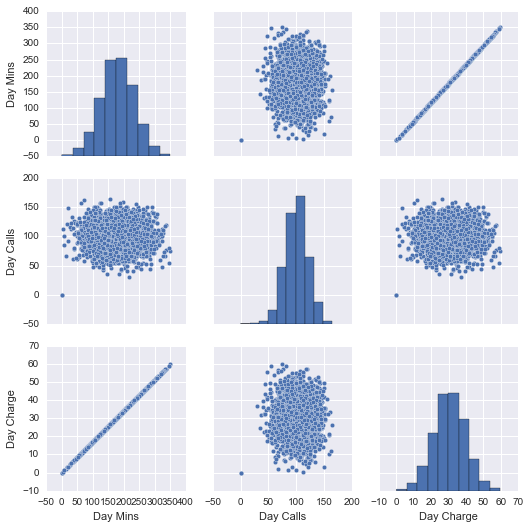

In [47]:
#Scatterplot Matrix
seaborn.pairplot(data = data, vars = ['Day Mins', 'Day Calls', 'Day Charge'])
plt.show()